K-Nearest Neighbors

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler #standard scaler için kullanılacak
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split #train, test olarak ayırma
import warnings
%matplotlib inline

In [101]:
warnings.filterwarnings("ignore")

In [102]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/teleCust1000t.csv')

In [103]:
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


Bağımsız Değişken:
- region : ikamet edilen bölge
- tenure : abonelik süresi
- age    : yaş
- marital: medeni durum
- address: adres
- income : gelir
- ed     : eğitim düzeyi
- employ : çalışma süresi veya istihdam durumu.
- retire : emekli olup olmadığı
- gender : cinsiyet
- reside : müşterinin yaşadığı yer

Bağımlı Değişken: 
- custcat: Müşterinin kategorisi

In [104]:
#Müşterinin kategorisine göre sayısal değerleri
df['custcat'].value_counts()

custcat
3    281
1    266
4    236
2    217
Name: count, dtype: int64

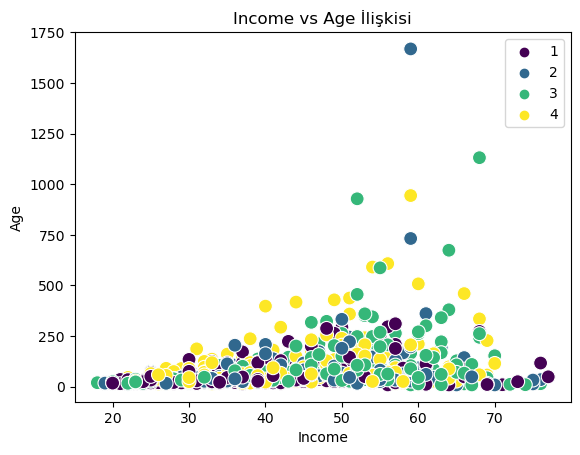

In [105]:
# 'income' ve 'age' sütunlarını seç
income = df['income']
age = df['age']

# Seaborn ile scatter plot
sns.scatterplot(x=age, y=income, hue=df['custcat'], palette='viridis', s=100)
plt.title('Income vs Age İlişkisi')
plt.xlabel('Income')
plt.ylabel('Age')
plt.legend()
plt.show()

1- Pick a value for K. (K Değerini Seçin)
2- Calculate the distance of unknown case from all cases. (dissmilaritly) (Bilinmeyen Durumun Tüm Durumlardan Uzaklığını Hesaplayın)
3- Select the K-observations in the training data that are "nearest" to the unknown data point. (Bilinmeyen Veri Noktasına En Yakın K Eğitim Veri Noktalarını Seçin)
4- Predict the response of the unknown data point, using the most popular response value from the K-nearest neighbors. (Bilinmeyen Veri Noktasının Yanıtını Tahmin Edin)

for unknow case, first pick k=1
calculate and make prediction until k=20
compare results.

K=1 İle Başlayın:
- İlk olarak, K değerini 1 olarak seçin. Bu, her bir tahmin için yalnızca en yakın komşunun kullanılacağı anlamına gelir.

Uzaklıkları Hesapla ve Tahmin Yap:
- Bilinmeyen durum için tüm eğitim verisi noktalarına olan uzaklıkları hesaplayın ve en yakın komşuyu seçerek tahmin yapın.

K Değerini Artırarak İşlemi Tekrarlayın:
- K değerini 2, 3, ..., 20 gibi artırarak aynı işlemi tekrarlayın. Her seferinde belirtilen K değeri için uzaklıkları hesaplayın ve en yakın K komşuyu kullanarak tahmin yapın.

Sonuçları Karşılaştırın:
- Her bir K değeri için yapılan tahmin sonuçlarını karşılaştırın. Bu karşılaştırma, farklı K değerlerinin modelin performansını nasıl etkilediğini anlamanıza yardımcı olacaktır.

# Exercise
- Normalize the data: StandardScaler
- Classification: KNeighborsClassifier
- Training: k=4

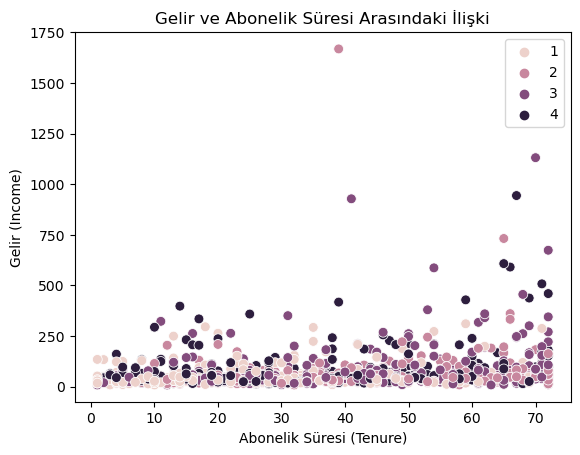

In [106]:
# income(gelir) ve tenure(abonelik süresi) arasındaki ilişki
income=df['income']
tenure=df['tenure']

sns.scatterplot(x=tenure, y=income, data=df,hue=df['custcat'], s=50)
plt.ylabel("Gelir (Income)")
plt.xlabel("Abonelik Süresi (Tenure)")
plt.title("Gelir ve Abonelik Süresi Arasındaki İlişki")
plt.legend()
plt.show()


In [107]:
#Cinsiyete göre müşterinin kategorisi
gender_custcat_values=df.groupby(['gender', 'custcat']).size()
print(gender_custcat_values)

#cinsiyeti=1 için  kaçıncı kategori?

gender  custcat
0       1          131
        2           98
        3          139
        4          115
1       1          135
        2          119
        3          142
        4          121
dtype: int64


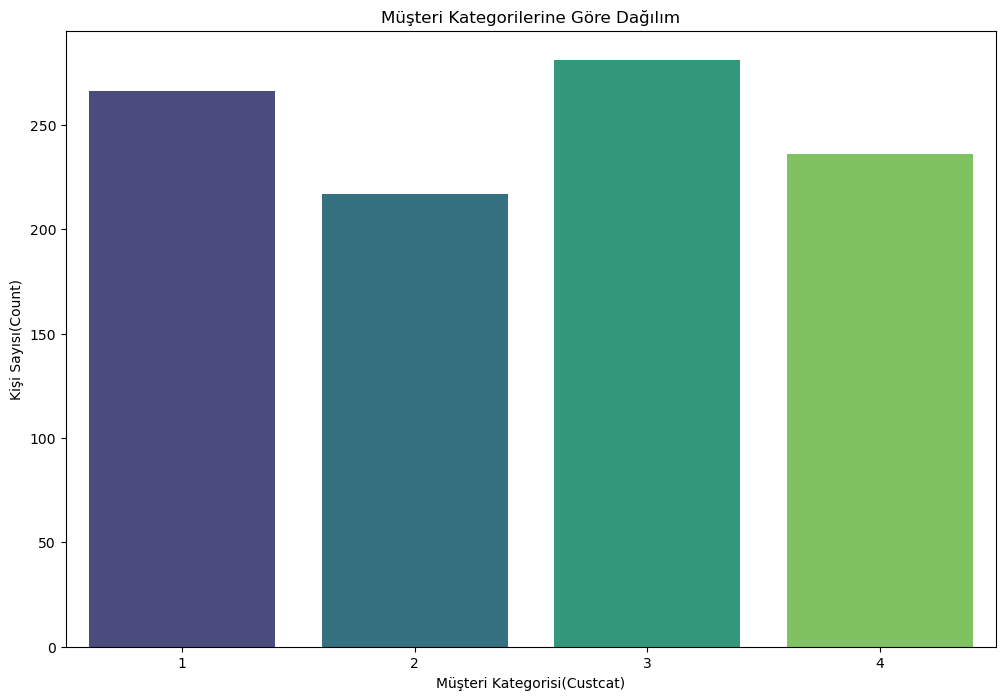

In [108]:
# Bar plot ile müşteri kategorisini görme
plt.figure(figsize=(12, 8))
sns.countplot(x='custcat', data=df,palette='viridis')
plt.xlabel('Müşteri Kategorisi(Custcat)')
plt.ylabel('Kişi Sayısı(Count)')
plt.title('Müşteri Kategorilerine Göre Dağılım')
plt.show()

In [109]:
#Bağımsız değişkenleri alma
x_data=df.loc[:, ['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed', 'employ', 'retire', 'gender', 'reside']]
print(x_data)

     region  tenure  age  marital  address  income  ed  employ  retire  \
0         2      13   44        1        9    64.0   4       5     0.0   
1         3      11   33        1        7   136.0   5       5     0.0   
2         3      68   52        1       24   116.0   1      29     0.0   
3         2      33   33        0       12    33.0   2       0     0.0   
4         2      23   30        1        9    30.0   1       2     0.0   
..      ...     ...  ...      ...      ...     ...  ..     ...     ...   
995       3      10   39        0        0    27.0   3       0     0.0   
996       1       7   34        0        2    22.0   5       5     0.0   
997       3      67   59        0       40   944.0   5      33     0.0   
998       3      70   49        0       18    87.0   2      22     0.0   
999       3      50   36        1        7    39.0   3       3     0.0   

     gender  reside  
0         0       2  
1         0       6  
2         1       2  
3         1       1  
4

In [123]:
y_data=df.loc[:, ['custcat']]
print(y_data)

     custcat
0          1
1          4
2          3
3          1
4          3
..       ...
995        1
996        1
997        4
998        3
999        2

[1000 rows x 1 columns]


In [111]:
#Verileri normalize etme
x_data=StandardScaler().fit(x_data).transform(x_data.astype(float))
print(x_data)


[[-0.02696767 -1.055125    0.18450456 ... -0.22207644 -1.03459817
  -0.23065004]
 [ 1.19883553 -1.14880563 -0.69181243 ... -0.22207644 -1.03459817
   2.55666158]
 [ 1.19883553  1.52109247  0.82182601 ... -0.22207644  0.96655883
  -0.23065004]
 ...
 [ 1.19883553  1.47425216  1.37948227 ... -0.22207644  0.96655883
  -0.92747794]
 [ 1.19883553  1.61477311  0.58283046 ... -0.22207644  0.96655883
  -0.92747794]
 [ 1.19883553  0.67796676 -0.45281689 ... -0.22207644  0.96655883
   0.46617787]]


In [112]:
#Train %80 ve Test %20 'i ayırma
x_train, x_test, y_train, y_test=train_test_split(x_data, y_data, test_size=0.2, random_state=5)

#Doğrulunu kontrol etme
print(x_train.shape)
print(x_test.shape)

(800, 11)
(200, 11)


In [113]:
#KNN ile sınıflandırma işlemi k=4 seçildi ve eğitim veri setleri kullanılarak fit edildi
knn=KNeighborsClassifier(n_neighbors=4)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [114]:
# Test verilerini kullanarak tahmin yapma
y_pred = knn.predict(x_test)

In [115]:
from sklearn.metrics import accuracy_score
acc_train=accuracy_score(y_train, knn.predict(x_train))
acc_test=accuracy_score(y_test, y_pred)
print("Train set acc: ", acc_train)
print("Test set acc: ", acc_test)


Train set acc:  0.565
Test set acc:  0.29


In [116]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [117]:
musteri_bilgileri=[2, 13, 44, 1, 9, 64.0, 4, 5, 0.0, 0, 2]
#normalizasyon:
musteri_bilgileri_norm = StandardScaler().fit_transform(np.array(musteri_bilgileri).reshape(1, -1))

In [118]:
predict_custcat=knn.predict(musteri_bilgileri_norm)
print("Tahmin Sonucu: ", predict_custcat)

Tahmin Sonucu:  [1]


In [119]:
#check accuracy of

In [120]:
Ks = 10
mean_acc=np.zeros((Ks-1))
mean_acc
std_acc=np.zeros((Ks-1))

In [121]:
for i in range (1, Ks):
    neigh=KNeighborsClassifier(n_neighbors=i).fit(x_train, y_train)
    # Test verilerini kullanarak tahmin yapma
    y_pred_ = knn.predict(x_test)
    mean_acc[i-1] = accuracy_score(y_test, y_pred_)
    std_acc[i-1]  = np.std(y_pred_==y_test)/np.sqrt(y_pred_.shape[0])

In [122]:
mean_acc

array([0.29, 0.29, 0.29, 0.29, 0.29, 0.29, 0.29, 0.29, 0.29])